Some more information on the tarfile library can be found here:
https://docs.python.org/3/library/tarfile.html

Information on using pyarrow to manipulate parquet files
https://arrow.apache.org/docs/python/parquet.html#reading-parquet-and-memory-mapping

Information on reading parquet files with pandas
https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [1]:
import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np

pd.set_option('display.max_columns', None)

In [37]:
##pip install hitdata7days_0.tar.gz

In [2]:
#Load tar.gz file into Python

tar = tarfile.open("hitdata7days_0.tar.gz","r:gz")
tar.next()

<TarInfo 'hitdata7days/visitday=10' at 0x7fba66458640>

In [34]:
#Extract all parquet files into computer memory

#tar.extractall()

In [29]:
#tar.next() example. But be careful to reinstantiate tar when needed

#tar.next()

In [3]:
#Extracting filename from TarInfo object

tn = tar.next()
tn.name

'hitdata7days/visitday=10/0017_part_00.parquet'

In [4]:
#Check if TarInfo is a file or a directory

print(tn.isreg())
print(tn.isdir())

True
False


In [5]:
#Reading info from parquet file

pq.read_schema(tn.name)

hitdatahistorymkey: int64
filename: string
linenumber: int32
brandcode: string
visitoridhigh: decimal128(20, 0)
visitoridlow: decimal128(20, 0)
visitnumber: decimal128(10, 0)
visitdatetime: timestamp[ns]
visitdate: date32[day]
visitmonth: int32
fiscalyear: int16
fiscalmonthnumber: int16
fiscalweeknumber: int16
hit_time_gmt: decimal128(11, 0)
service: string
acceptlanguage: string
eventlist: string
homepage: string
ip: string
pageevent: decimal128(3, 0)
pageeventvar1: string
pageeventvar2: string
pagetype: string
pageurl: string
pagename: string
productlist: string
userserver: string
channel: string
sitesection: string
category: string
subcategory: string
subcategory2: string
pagecategory: string
searchterms: string
searchresults: string
refinementtype: string
refinementattribute: string
myaccountengagement: string
formanalysis: string
emailsubscriptionadd: string
emailsubscriptionremove: string
linklocation: string
navigationlinks: string
searchtype: string
businessunit: string
categor

In [6]:
#Read in parquet file as pandas DataFrame

df = pd.read_parquet(tn.name)

In [7]:
df.head()

,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,18598956716,hit_data_fingerhutcomprod_2022-12-10.tsv,14603,FDM,2450573847312321896,394589978322276787,3,2022-12-10 00:08:42,2022-12-10,12,2022,12,50,1670652522,pe,"en-US,en;q=0.9","20599,111,112,127,129,145,155,171,182,10005,10...",U,172.58.8.3,10,None,no link_name,None,https://www.fingerhut.com/,index,None,None,None,None,None,None,None,index,None,None,None,None,None,None,None,https://www.fingerhut.com/,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,FSApproved,None,None,None,None,71268c61620e4cf9b4b469d9b5b46b6e,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,None,0,0,None,None,None,None,None,1063982382,961,1873,Y,N,Y,2,4,300,t-mobile.com,9/11/2022 21:8

In [8]:
#Read in parquet file as pandas DataFrame

columns = ['evar23','geocountry']
df2 = pd.read_parquet(tn.name,columns=columns)

In [9]:
df2

,evar23,geocountry
0,None,usa
1,3344562260,usa
2,3966320789,usa
3,3776999061,usa
4,2313573947,usa
...,...,...
124862,3645074850,usa
124863,3879356439,usa
124864,2892831624,usa
124865,3966210834,usa


In [74]:
#  check user's domain
columns2 = ['evar23','domain']
df3 = pd.read_parquet(tn.name,columns=columns2)
df3

,evar23,domain
0,None,t-mobile.com
1,3344562260,amazon.com
2,3966320789,rr.com
3,3776999061,comcast.net
4,2313573947,suddenlink.net
...,...,...
124862,3645074850,myvzw.com
124863,3879356439,135.84.225.136
124864,2892831624,mycingular.net
124865,3966210834,t-mobile.com


In [75]:
%%time
#Collect columns from all parquet files into a pandas DataFrame

columns = ['evar23','domain']
dfs2 = []
for member in tar:
    if member.isreg():
        df_temp = pd.read_parquet(member.name,columns = columns)
        dfs.append(df_temp)

df_all2 = pd.concat(dfs)
df_all2

CPU times: user 1.38 s, sys: 657 ms, total: 2.04 s
Wall time: 2.11 s


,evar23,geocountry,domain
0,None,usa,NaN
1,3344562260,usa,NaN
2,3966320789,usa,NaN
3,3776999061,usa,NaN
4,2313573947,usa,NaN
...,...,...,...
135658,None,NaN,frontier.com
135659,None,NaN,mycingular.net
135660,3957569420,NaN,t-mobile.com
135661,3960714152,NaN,mycingular.net


In [10]:
%%time
#Collect columns from all parquet files into a pandas DataFrame

columns = ['evar23','geocountry']
dfs = []
for member in tar:
    if member.isreg():
        df_temp = pd.read_parquet(member.name,columns = columns)
        dfs.append(df_temp)

df_all = pd.concat(dfs)

CPU times: user 13.3 s, sys: 1.11 s, total: 14.4 s
Wall time: 14.6 s


In [76]:
print("Number of site visits without user ID")
print(np.sum(df_all2.evar23.isnull()))

Number of site visits without user ID
3209946


In [77]:
print("Number of distinct domains visited from")
print(len(df_all2.domain.unique())-1)
print(df_all2.domain.unique())

Number of distinct domains visited from
10737
[nan 't-mobile.com' 'amazon.com' ... '131.226.112.6' 'atgfw.com'
 '198.206.160.20']


In [84]:
domain = pd.DataFrame(df_all2.groupby(['domain'])['domain'].count())
domain.rename(
    columns={"domain": "nums"},
    inplace=True,
)
domain

,nums
domain,
100.42.145.14,27
100.42.147.122,12
100.42.148.82,14
100.42.152.100,18
100.42.152.198,155
...,...
zoominternet.net,15098
zscaler.com,3742
zscaler9.net,16


In [85]:
# test = domain.sort_values(['nums'], ascending=[0])
# test

,nums
domain,
comcast.net,1157698
spectrum.com,611443
rr.com,610815
t-mobile.com,544204
myvzw.com,508448
...,...
168.91.114.65,1
171.22.63.101,1
67.216.97.146,1


<ipython-input-169-37df6f187f6e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_top[10] = not_top_ten_sum
No handles with labels found to put in legend.


nums    1850697
dtype: int64
                  nums
domain                
comcast.net    1157698
spectrum.com    611443
rr.com          610815
t-mobile.com    544204
myvzw.com       508448
sbcglobal.net   471192
cox.net         210433
verizon.net     184835
att.com         175388
att.net         133456


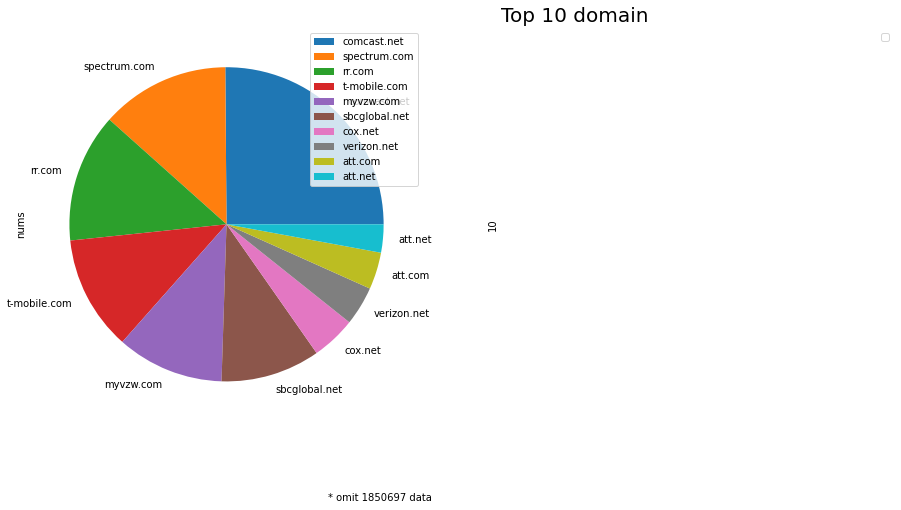

In [169]:
import matplotlib.pyplot as plt

# Sort the DataFrame in descending order; will create a Series
s_temp = domain.sort_values(['nums'], ascending=[0])
s_temp

# Count how many rows are not in the top ten
not_top_ten = len(s_temp) - 10
not_top_ten
    
# Sum the values not in the top ten
not_top_ten_sum = s_temp.tail(not_top_ten).sum()
print(not_top_ten_sum)

# Get the top ten values
s_top = s_temp.head(10)
print(s_top)

# Append the sum of not-top-ten values to the Series
s_top[10] = not_top_ten_sum

# Plot pie chart

_ = s_top.plot.pie(subplots=True)

# Show plot

plt.title('Top 10 domain',fontsize = 20, loc='left')
#plt.legend(loc = "upper left")
plt.gcf().text(0.93,0.04,"* omit 1850697 data", ha="right")
plt.subplots_adjust(left=0, bottom=0, right=2, top=2)
plt.show()

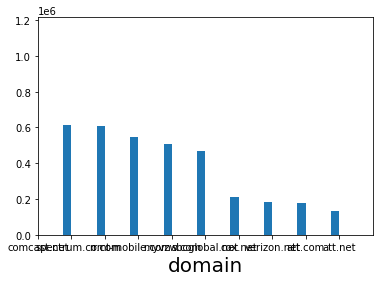

In [168]:
ax2 = s_top.plot.bar(rot=0)
ax2.get_legend().remove()
plt.xlim(0, 10)
ax2.xaxis.label.set_size(20)
plt.show()

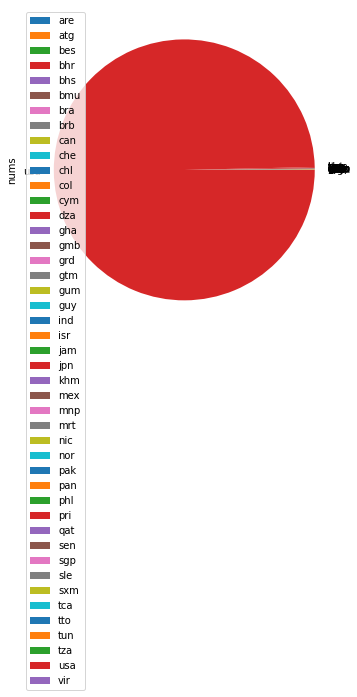

In [ ]:
%%time
#Don't do this! Collect all dataframes into list and then concatenate all at once!

columns = ['evar23','geocountry']
dfs = pd.DataFrame()
for member in tar:
    if member.isreg():
        df_temp = pd.read_parquet(member.name,columns = columns)
        dfs = pd.concat([dfs,df_temp])

In [11]:
df_all

,evar23,geocountry
0,None,usa
1,3344562260,usa
2,3966320789,usa
3,3776999061,usa
4,2313573947,usa
...,...,...
135658,None,usa
135659,None,usa
135660,3957569420,usa
135661,3960714152,usa


In [63]:
country_count = pd.DataFrame(df_all.groupby(['geocountry'])['geocountry'].count())
country_count
country_count.rename(
    columns={"geocountry": "nums"},
    inplace=True,
)

country_count

,nums
geocountry,
are,5
atg,155
bes,23
bhr,2595
bhs,18
bmu,30
bra,252
brb,31
can,3685


In [70]:
total = int(country_count.sum())
total

6458609

In [72]:
country_count['proportion'] = country_count.div(total)
country_count

,nums,proportion
geocountry,,
are,5,7.741605e-07
atg,155,2.399898e-05
bes,23,3.561138e-06
bhr,2595,4.017893e-04
bhs,18,2.786978e-06
bmu,30,4.644963e-06
bra,252,3.901769e-05
brb,31,4.799795e-06
can,3685,5.705563e-04


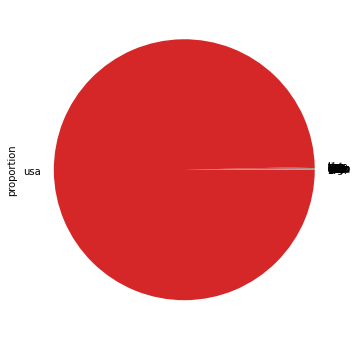

In [73]:
plot = country_count['proportion'].plot.pie(subplots=True, figsize=(11, 6))

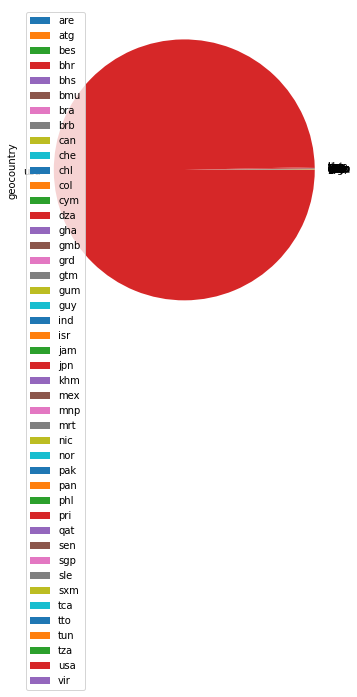

In [32]:
plot = country_count.plot.pie(subplots=True, figsize=(11, 6))

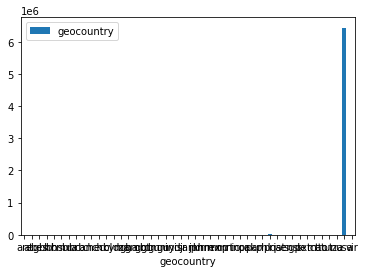

In [29]:
ax = country_count.plot.bar(rot=0)

In [100]:
# drop 'proportion col'
#country_count = country_count.drop(['proportion'], axis=1)
#country_count

KeyError: "['proportion'] not found in axis"

<ipython-input-103-8b2673d9d6bc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_top[10] = not_top_ten_sum
No handles with labels found to put in legend.


               nums
geocountry         
usa         6435954
pri            9578
can            3685
ind            2643
bhr            2595
mex            1893
vir             547
phl             328
bra             252
gum             182


NameError: name 'plt' is not defined

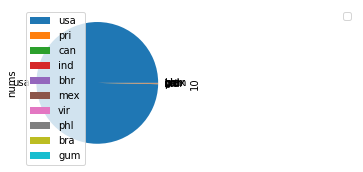

In [103]:
# Sort the DataFrame in descending order; will create a Series
s_temp = country_count.sort_values(['nums'], ascending=[0])
s_temp

# Count how many rows are not in the top ten
not_top_ten = len(s_temp) - 10
not_top_ten
    
# Sum the values not in the top ten
not_top_ten_sum = s_temp.tail(not_top_ten).sum()
not_top_ten_sum

# Get the top ten values
s_top = s_temp.head(10)
print(s_top)

# Append the sum of not-top-ten values to the Series
s_top[10] = not_top_ten_sum

# Plot pie chart
_ = s_top.plot.pie(subplots=True)

# Show plot
plt.show()

In [12]:
print("Number of site visits without user ID")
print(np.sum(df_all.evar23.isnull()))

Number of site visits without user ID
1604973


In [13]:
print("Number of site visits total")
print(len(df_all))

Number of site visits total
6458609


In [14]:
print("Proportion of site visits without user ID")
print(np.sum(df_all.evar23.isnull())/len(df_all))

Proportion of site visits without user ID
0.24850134138790567


In [15]:
print("Number of distinct user IDs")
print(len(df_all.evar23.unique())-1)

Number of distinct user IDs
142243


In [16]:
print("Number of distinct countries visited from")
print(len(df_all.geocountry.unique())-1)

Number of distinct countries visited from
44


In [17]:
#Which countries visited

print(df_all.geocountry.unique())

['usa' 'pri' 'mex' 'vir' 'bra' 'can' 'bhr' 'jam' 'ind' 'phl' 'col' 'nic'
 'isr' 'bhs' 'gtm' 'cym' 'dza' 'gum' 'chl' 'sen' 'bmu' 'pak' 'khm' 'tto'
 'grd' 'che' 'pan' 'tza' 'sxm' 'guy' 'gha' 'mrt' 'tca' 'brb' 'nor' 'sle'
 'jpn' 'gmb' 'bes' 'mnp' 'qat' 'are' 'tun' 'sgp' 'atg']


In [78]:
# df_subset = df_all.drop_duplicates(subset=['evar23'])
# df_subset = df_subset.iloc[1: , :]
# df_subset.value_counts('geocountry') / len(df_subset.index)